In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Student Data

In [2]:
#df = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
import sqlite3

In [4]:
conn = sqlite3.connect('studentdb.sqlite3')
cursor = conn.cursor()

In [5]:
#df.to_sql("Students", conn, index = True, if_exists="replace", index_label='id')


In [6]:
cursor.execute('''
SELECT *
FROM Students
 ''')
student_data = cursor.fetchall()

In [7]:
columns = [header[0] for header in cursor.description]
df = pd.DataFrame(student_data, columns=columns)

In [8]:
conn.close()

In [9]:
passing_score = 70
df['Passed'] = [int(score >= passing_score) for score in df['Exam_Score']]
df.head()

,id,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Passed
0,0,23,84,Low,High,No,7,73,Low,Yes,...,Medium,Public,Positive,3,No,High School,Near,Male,67,0
1,1,19,64,Low,Medium,No,8,59,Low,Yes,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,0
2,2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,1
3,3,29,89,Low,Medium,Yes,8,98,Medium,Yes,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,1
4,4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,...,High,Public,Neutral,4,No,College,Near,Female,70,1


In [10]:
#Assuming a score of 70 is passing
pass_rate = df['Passed'].sum()/len(df['Passed'])
print(f"The rate of students that passed with a passing score of {70} is {pass_rate*100:.2f}%")

The rate of students that passed with a passing score of 70 is 24.60%


In [11]:
df.head()

,id,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Passed
0,0,23,84,Low,High,No,7,73,Low,Yes,...,Medium,Public,Positive,3,No,High School,Near,Male,67,0
1,1,19,64,Low,Medium,No,8,59,Low,Yes,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,0
2,2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,1
3,3,29,89,Low,Medium,Yes,8,98,Medium,Yes,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,1
4,4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,...,High,Public,Neutral,4,No,College,Near,Female,70,1


# Plots

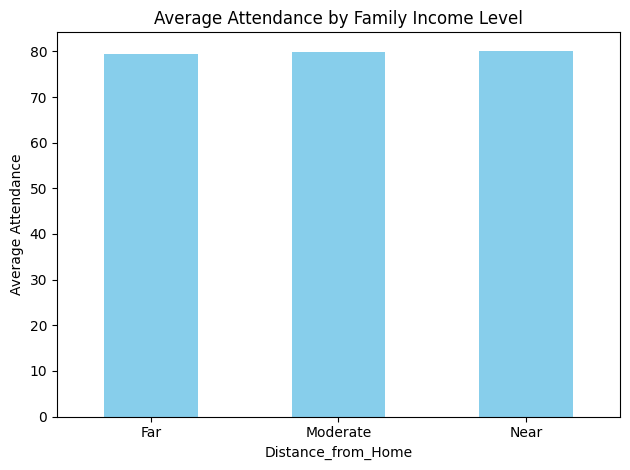

In [12]:
avg_attendance = df.groupby('Distance_from_Home')['Attendance'].mean()

# Plot
avg_attendance.plot(kind='bar', color='skyblue')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Family Income Level')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

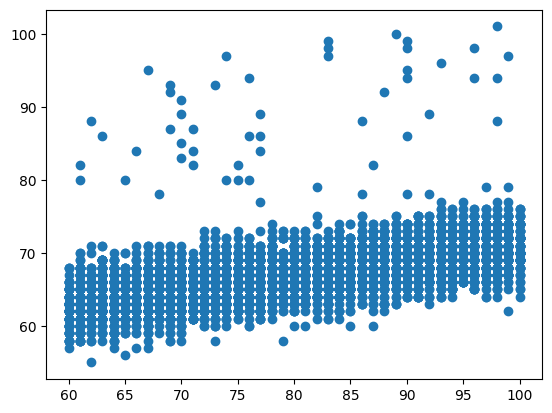

In [13]:
plt.scatter(df['Attendance'], df['Exam_Score'])

# Data prep for models

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
rating_lists = ([['Low', 'Medium', 'High'],
                         ['No', 'Yes'],
                         ['Public', 'Private'],
                         ['Negative', 'Neutral', 'Positive'],
                         ['Male', 'Female'],
                         ['Near', 'Moderate', 'Far'],
                         ['High School', 'College', 'Postgraduate']])



ordinal_maps = []

for rating_list in rating_lists:
    # Create a dictionary where each category is mapped to an integer
    ordinal_map = {rating_list[i]: i for i in range(len(rating_list))}
    ordinal_maps.append(ordinal_map)

ordinal_maps


[{'Low': 0, 'Medium': 1, 'High': 2},
 {'No': 0, 'Yes': 1},
 {'Public': 0, 'Private': 1},
 {'Negative': 0, 'Neutral': 1, 'Positive': 2},
 {'Male': 0, 'Female': 1},
 {'Near': 0, 'Moderate': 1, 'Far': 2},
 {'High School': 0, 'College': 1, 'Postgraduate': 2}]

In [16]:
numeric_features = []  # continuous vars
categorical_features = []  # encoded as 0/1 or 0/1/2

for col in columns:
    if type(df[col][0]) != str:
            numeric_features.append(col) #Representing these as numerical variables for scaling later
    else:
        categorical_features.append(col) #Representing these as categorical so they are not scaled
       
        for i in range(len(rating_lists)):
            if set(df[col].dropna().unique()) == set(rating_lists[i]):
                #print(f"{col} follows the following hierarchy: {rating_lists[i]}")
                 df[col] = df[col].map(ordinal_maps[i]) #Encoding variables
                 df[col] = df[col].fillna(df[col].median()) #Filling NAN values with median value
        
print(f"Categorical features: {categorical_features}")
print(f"Numeric features: {numeric_features}")

Categorical features: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Numeric features: ['id', 'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


In [17]:
df.head()

,id,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Passed
0,0,23,84,0,2,0,7,73,0,1,...,1.0,0,2,3,0,0.0,0.0,0,67,0
1,1,19,64,0,1,0,8,59,0,1,...,1.0,0,0,4,0,1.0,1.0,1,61,0
2,2,24,98,1,1,1,7,91,1,1,...,1.0,0,1,4,0,2.0,0.0,0,74,1
3,3,29,89,0,1,1,8,98,1,1,...,1.0,0,0,4,0,0.0,1.0,0,71,1
4,4,19,92,1,1,1,6,65,1,1,...,2.0,0,1,4,0,1.0,0.0,1,70,1


# Models

Will use logistic regression, lasso regression, random forest, and XGBoost

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
numeric_features.remove('Exam_Score')


In [20]:

X = df.drop(['Exam_Score', 'Passed'], axis=1)
y = df['Passed']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [22]:
# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)  # leave encoded cats alone
    ]
)

# Wrap in a pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Fit the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['id', 'Hours_Studied',
                                                   'Attendance', 'Sleep_Hours',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions',
                                                   'Physical_Activity']),
                                                 ('cat', 'passthrough',
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Extracurricular_Activities',
                                                   'Motivation_Level',
                                                   'Internet_Access',
                                                   'Family_Income',
                                                   'Teacher_Quality',
                                                   'School_Type',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home',
                                                   'Gender'])])),
                ('logreg', LogisticRegression(max_iter=1000))])

In [23]:
logistic_pred = clf.predict(X_test) #Making predictions on testing data

logistic_scores = clf.predict_proba(X_test)
logistic_scores = logistic_scores[:, 1]



In [24]:
coef = clf.named_steps['logreg'].coef_[0]

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coef
})

top_coef = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

top_coef.head(5)


,Feature,Coefficient
2,Attendance,4.734646
1,Hours_Studied,3.730366
11,Family_Income,2.117901
8,Motivation_Level,2.071952
7,Previous_Scores,1.971487


In [25]:
logistic_acc = accuracy_score(y_test, logistic_pred)
print(f"The accuracy score of the logistic model is {logistic_acc:.2f}")

The accuracy score of the logistic model is 0.98


In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


In [27]:
#roc_auc_score(y_test, logistic_scores)

In [28]:
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, logistic_scores)

In [29]:
logistic_auc = auc(fpr_logit, tpr_logit)

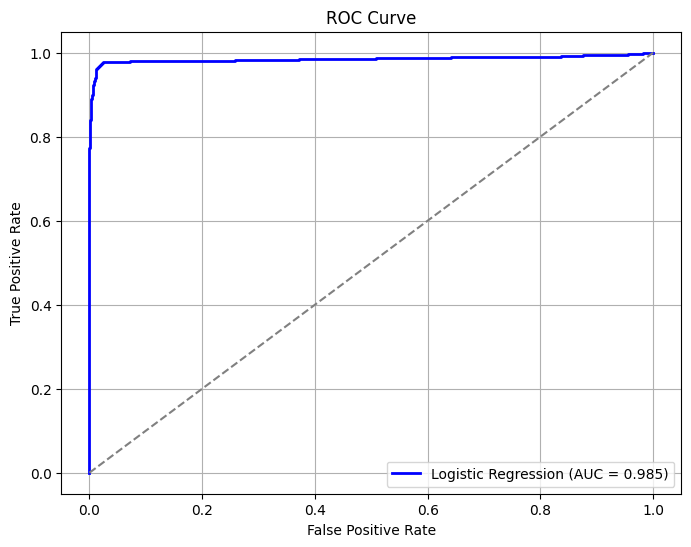

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_logit, tpr_logit, color='blue', lw=2, label=f'Logistic Regression (AUC = {logistic_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [31]:
df.head()

,id,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Passed
0,0,23,84,0,2,0,7,73,0,1,...,1.0,0,2,3,0,0.0,0.0,0,67,0
1,1,19,64,0,1,0,8,59,0,1,...,1.0,0,0,4,0,1.0,1.0,1,61,0
2,2,24,98,1,1,1,7,91,1,1,...,1.0,0,1,4,0,2.0,0.0,0,74,1
3,3,29,89,0,1,1,8,98,1,1,...,1.0,0,0,4,0,0.0,1.0,0,71,1
4,4,19,92,1,1,1,6,65,1,1,...,2.0,0,1,4,0,1.0,0.0,1,70,1


In [32]:
from sklearn.linear_model import LassoCV

# Cross-validated LASSO model
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Predict on test set
lasso_scores = lasso_cv.predict(X_test)

# ROC and AUC
fpr_lasso, tpr_lasso, thresholds_lasso = roc_curve(y_test, lasso_scores)
lasso_auc = auc(fpr_lasso, tpr_lasso)


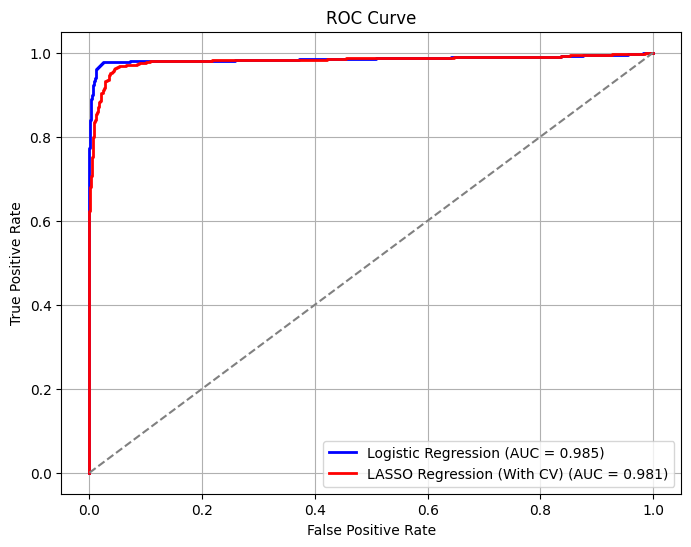

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_logit, tpr_logit, color='blue', lw=2, label=f'Logistic Regression (AUC = {logistic_auc:.3f})')
plt.plot(fpr_lasso, tpr_lasso, color='red', lw=2, label=f'LASSO Regression (With CV) (AUC = {lasso_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [34]:

# Get coefficients and feature names
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_cv.coef_
})

# Check eliminated variables
eliminated = coef_df[coef_df['Coefficient'] == 0]
kept = coef_df[coef_df['Coefficient'] != 0]

print("🔴 Eliminated variables (coeff = 0):")
print(eliminated)

print("\n🟢 Variables kept by LASSO:")
print(kept)


🔴 Eliminated variables (coeff = 0):
        Feature  Coefficient
13  School_Type         -0.0
19       Gender          0.0

🟢 Variables kept by LASSO:
                       Feature  Coefficient
0                           id     0.000004
1                Hours_Studied     0.026449
2                   Attendance     0.018625
3         Parental_Involvement     0.070001
4          Access_to_Resources     0.084268
5   Extracurricular_Activities     0.021499
6                  Sleep_Hours     0.000591
7              Previous_Scores     0.004568
8             Motivation_Level     0.038659
9              Internet_Access     0.016675
10           Tutoring_Sessions     0.039915
11               Family_Income     0.044035
12             Teacher_Quality     0.030015
14              Peer_Influence     0.045643
15           Physical_Activity     0.014777
16       Learning_Disabilities    -0.000319
17    Parental_Education_Level     0.033495
18          Distance_from_Home    -0.035983


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [37]:

rf_scores = rfc.predict(X_test)


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_scores)
rf_auc = auc(fpr_rf, tpr_rf)

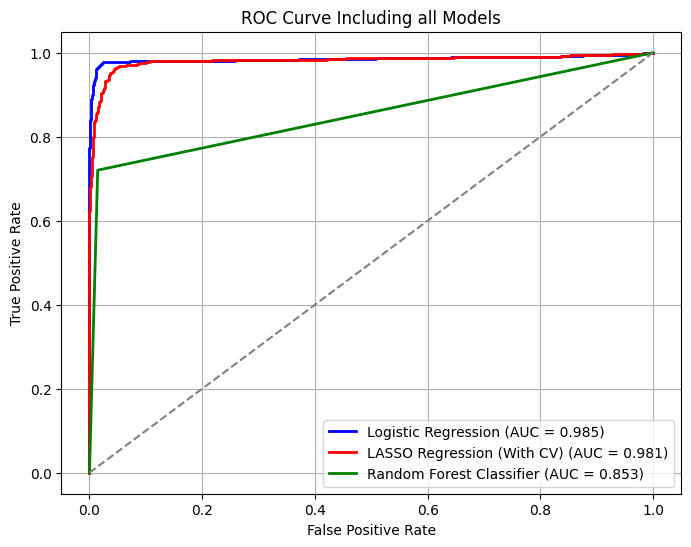

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_logit, tpr_logit, color='blue', lw=2, label=f'Logistic Regression (AUC = {logistic_auc:.3f})')
plt.plot(fpr_lasso, tpr_lasso, color='red', lw=2, label=f'LASSO Regression (With CV) (AUC = {lasso_auc:.3f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest Classifier (AUC = {rf_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Including all Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [39]:
import xgboost as xgb

In [40]:
# Initialize and train classifier
gb_model = xgb.XGBClassifier(eval_metric='logloss', eta = 0.3, n_estimators = 3000, objective='binary:logistic')
gb_model.fit(X_train, y_train)

# Predict
y_pred = gb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9496783957623912


In [41]:

fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred)
gb_auc = auc(fpr_gb, tpr_gb)

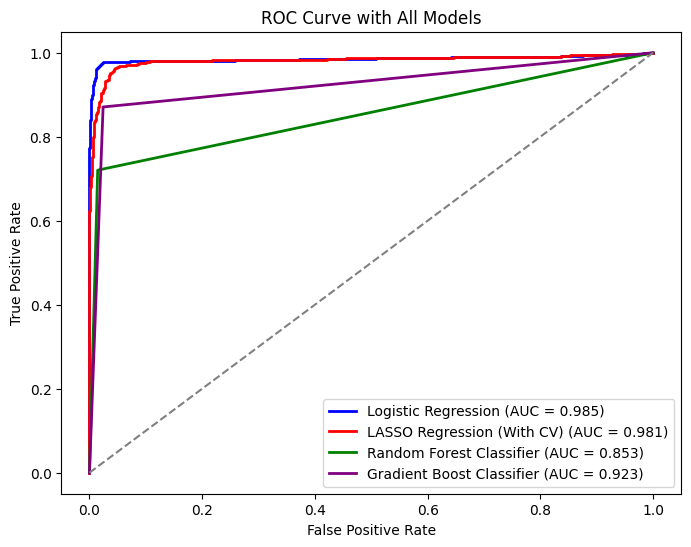

In [42]:


plt.figure(figsize=(8, 6))

#Lines
plt.plot(fpr_logit, tpr_logit, color='blue', lw=2, label=f'Logistic Regression (AUC = {logistic_auc:.3f})')
plt.plot(fpr_lasso, tpr_lasso, color='red', lw=2, label=f'LASSO Regression (With CV) (AUC = {lasso_auc:.3f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest Classifier (AUC = {rf_auc:.3f})')
plt.plot(fpr_gb, tpr_gb, color='purple', lw=2, label=f'Gradient Boost Classifier (AUC = {gb_auc:.3f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with All Models')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()